In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
random.seed()

In [2]:
number_walkers = 50
steps = 60000
therm_step = 600
therm = 10000
trials1 = 12
trials2 = 12
dR = 1

In [3]:
A1 = 0.9
dA1 = 0.05
A2 = 1.9
dA2 = 0.05

In [4]:
DIST = 2
def ran_pos():
    return DIST * (2*random.random()-1)

def rand():
    return random.random()*2 - 1

In [5]:
Y = []
X = []
for i in range(0,trials1):
    X.append(A1+i*dA1)

In [6]:
class Position:
    def __init__(self, R):
        self.R = R
    
    def norm(self, i):
        return math.sqrt(self.R[i][0]**2+self.R[i][1]**2+self.R[i][2]**2)
    
    def dist(self):
        sum = 0
        for i in range(0,3):
            sum += (self.R[1][i] - self.R[0][i])**2
        return math.sqrt(sum)
    
    def dot(self,i):
        sum = 0
        for j in range(0,3):
            sum += self.R[i][j]*(self.R[0][j] - self.R[1][j])
        return sum/ (self.norm(i)*self.dist())
    
    #Nuevo punto
    def step(self):
        R_new = [[0,0,0],[0,0,0]]
        for i in range(0,2):
            for j in range(0,3):
                R_new[i][j] = self.R[i][j] + rand()*dR
        return R_new

In [7]:
# Distribución de probabillidad
def prob(R,A):
    r1 = R.norm(0)
    r2 = R.norm(1)
    return (math.exp(-A[0]*(R.norm(0) + R.norm(1))))**2

#Energía local
def energy(R,A):
    r = R.dist()
    r1 = R.norm(0)
    r2 = R.norm(1)
    V = (2/r1 + 2/r2 - 1/r)
    return -A[0]**2 + A[0]/r1 + A[0]/r2 - V

#Obtener el valor mínimo
B = [0,0]
min = [0,B]

In [8]:
for l in range(0,trials1):
    avg = 0
    A = [A1+l*dA1, A2]
    # loop para multiples caminantes
    for k in range(0,number_walkers):
        #Punto inicial
        Ri = [[ran_pos(), ran_pos(), ran_pos()], [ran_pos(), ran_pos(), ran_pos()]]
        R = Position(Ri)
        #Almacenar puntos Monte-Carlo
        points = []
        for i in range(0,steps):
            #Generamos nuevo punto
            R_new = Position(R.step())
            #Probabilidad de aceptación
            try:
                    p = prob(R_new, A)/prob(R,A)
            except ZeroDivisionError:
                print(R,A)
            
            #checar si se acepta nueva posición
            if p >= random.random():
                R = R_new
            
            #Terminar
            if i > therm:
                if (i-therm) % therm_step == 0:
                    points.append(R)
        
        #Evaluar integral
        sum = 0
        for i in range(0,len(points)):
            sum += energy(points[i], A)
        avg += sum/len(points)
    del points
    if avg/number_walkers < min[0]:
        min[0] = avg/number_walkers
        min[1] = A
    
    Y.append(avg/number_walkers)

print(min)

[-2.7849377006505964, [1.4500000000000002, 1.9]]


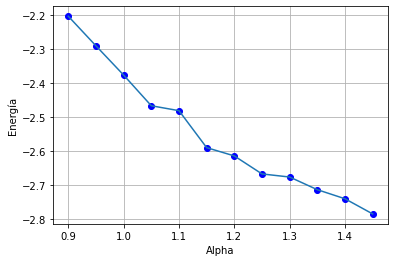

In [9]:
plt.xlabel('Alpha')
plt.ylabel('Energía')
plt.plot(X,Y,'bo',X,Y)
plt.grid(True)
plt.show()